# Community Engagement Metric- "Most Active Neighborhood"
For my submetric, I define "best" as the community with the most amount of engagement. I used the Community Center Daily Attendance dataset from WPRDC to measure the enagement through the attendance levels each year in different centers. Neighborhoods with higher total attendance represent stronger participation in community events and programs.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
attendance = pd.read_csv("attendance.csv")

# Optional: see first 10 rows
attendance.head(10)

# Optional: check summary info
attendance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32201 entries, 0 to 32200
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               32201 non-null  int64 
 1   date              32201 non-null  object
 2   center_name       32201 non-null  object
 3   attendance_count  32201 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1006.4+ KB


In [8]:
# Fill missing names
attendance["center_name"] = attendance["center_name"].fillna("Unknown")

# Filter only Community Centers (based on name)
attendance = attendance[attendance["center_name"].str.contains("Community Center")]

# Keep only relevant columns
attendance = attendance[["center_name", "attendance_count"]]
attendance.head(10)

,center_name,attendance_count
0,Ormsby Community Center,4
1,Warrington Community Center,5
2,Magee Community Center,7
3,West Penn Community Center,50
4,Arlington Community Center,12
5,Brookline Community Center,21
6,Ormsby Community Center,5
7,Paulson Community Center,9
8,Phillips Community Center,7
9,Warrington Community Center,26


In [11]:
# Group by center_name and sum attendance
attendance_by_center = attendance.groupby("center_name")["attendance_count"].sum().sort_values(ascending=False)

# Display the result
attendance_by_center

center_name
Brookline Community Center     375953
West Penn Community Center     262334
Phillips Community Center      248765
Ammon Community Center         176536
Warrington Community Center    126136
Ormsby Community Center        104454
Magee Community Center         103289
Jefferson Community Center      75367
Paulson Community Center        73446
Arlington Community Center      72742
Name: attendance_count, dtype: int64

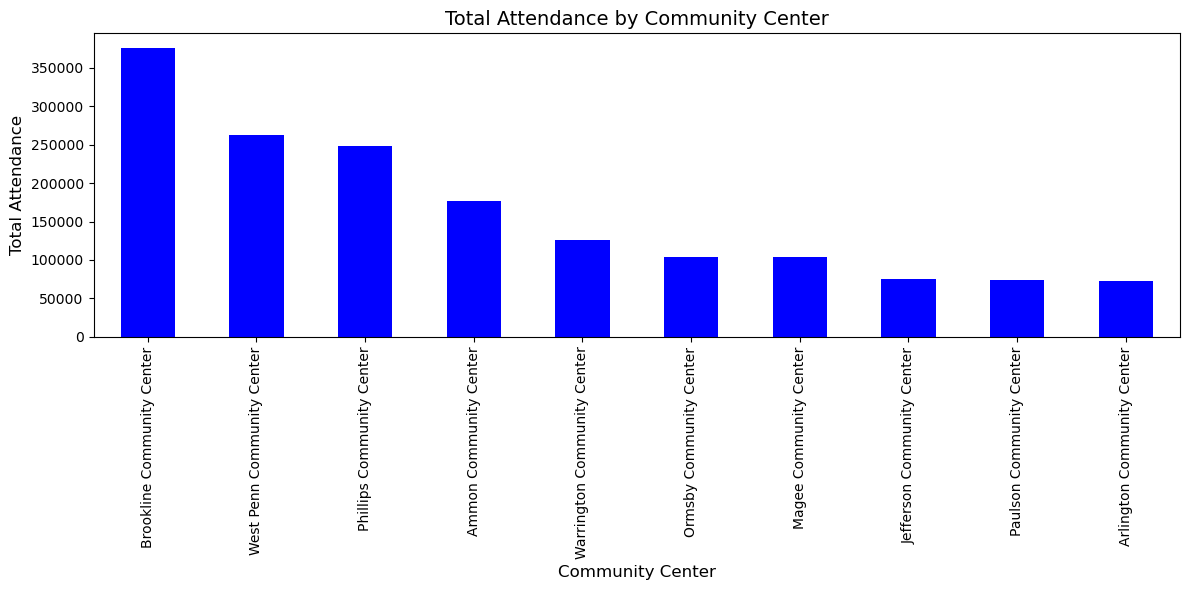

In [10]:
plt.figure(figsize=(12,6))
attendance_by_center.plot(kind='bar', color='blue')
plt.title("Total Attendance by Community Center", fontsize=14)
plt.xlabel("Community Center", fontsize=12)
plt.ylabel("Total Attendance", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()